In [ ]:
#!pip install jovian --upgrade --quiet

In [1]:
import torch
#import jovian
import torchvision
import matplotlib
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:
project_name='02-Wine-Quality-Prediction' # will be used by jovian.commit

In [3]:
dataframe_raw = pd.read_csv("./work/data/TrainingDataset.csv",sep=";")
dataframe_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6
1,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.9982,3.52,0.65,9.7,5
2,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
3,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.9968,3.17,0.53,9.4,5
4,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.43,0.63,9.7,6


In [4]:
dataframe_raw.shape

(1279, 12)

In [5]:
input_cols=list(dataframe_raw.columns)[:-1]
output_cols = ['quality']
input_cols,output_cols

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 ['quality'])

In [6]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe_raw.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    #for col in categorical_cols:
        #dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [7]:
inputs_array, targets_array = dataframe_to_arrays(dataframe_raw)
inputs_array, targets_array

(array([[ 8.9  ,  0.22 ,  0.48 , ...,  3.39 ,  0.53 ,  9.4  ],
        [ 7.6  ,  0.39 ,  0.31 , ...,  3.52 ,  0.65 ,  9.7  ],
        [ 7.9  ,  0.43 ,  0.21 , ...,  3.17 ,  0.91 ,  9.5  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array([[6],
        [5],
        [5],
        ...,
        [6],
        [5],
        [6]]))

In [8]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
inputs,targets

(tensor([[ 8.9000,  0.2200,  0.4800,  ...,  3.3900,  0.5300,  9.4000],
         [ 7.6000,  0.3900,  0.3100,  ...,  3.5200,  0.6500,  9.7000],
         [ 7.9000,  0.4300,  0.2100,  ...,  3.1700,  0.9100,  9.5000],
         ...,
         [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
         [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
         [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]]),
 tensor([[6.],
         [5.],
         [5.],
         ...,
         [6.],
         [5.],
         [6.]]))

In [9]:
print('Shape of input tensor and target tensor::  ',inputs.shape, targets.shape)
print('datatype of input tensor and target tensor::  ',inputs.dtype, targets.dtype)

Shape of input tensor and target tensor::   torch.Size([1279, 11]) torch.Size([1279, 1])
datatype of input tensor and target tensor::   torch.float32 torch.float32


In [10]:
dataset = TensorDataset(inputs, targets)
dataset

In [13]:
train_ds, val_ds = random_split(dataset, [1000, 279])
batch_size=50
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [14]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[6.9000e+00, 6.3000e-01, 2.0000e-02, 1.9000e+00, 7.8000e-02, 1.8000e+01,
         3.0000e+01, 9.9712e-01, 3.4000e+00, 7.5000e-01, 9.8000e+00],
        [9.1000e+00, 3.0000e-01, 4.1000e-01, 2.0000e+00, 6.8000e-02, 1.0000e+01,
         2.4000e+01, 9.9523e-01, 3.2700e+00, 8.5000e-01, 1.1700e+01],
        [9.5000e+00, 8.8500e-01, 2.7000e-01, 2.3000e+00, 8.4000e-02, 3.1000e+01,
         1.4500e+02, 9.9780e-01, 3.2400e+00, 5.3000e-01, 9.4000e+00],
        [7.7000e+00, 1.8000e-01, 3.4000e-01, 2.7000e+00, 6.6000e-02, 1.5000e+01,
         5.8000e+01, 9.9470e-01, 3.3700e+00, 7.8000e-01, 1.1800e+01],
        [7.2000e+00, 4.1000e-01, 3.0000e-01, 2.1000e+00, 8.3000e-02, 3.5000e+01,
         7.2000e+01, 9.9700e-01, 3.4400e+00, 5.2000e-01, 9.4000e+00],
        [9.9000e+00, 3.2000e-01, 5.6000e-01, 2.0000e+00, 7.3000e-02, 3.0000e+00,
         8.0000e+00, 9.9534e-01, 3.1500e+00, 7.3000e-01, 1.1400e+01],
        [1.0800e+01, 4.7000e-01, 4.3000e-01, 2.1000e+00, 1.7100e-01, 2.7000e+01,
     

In [15]:
 print(xb.dtype,yb.dtype)

torch.float32 torch.float32


In [16]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size,output_size

(11, 1)

In [17]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size) #???                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb): 
        out = self.linear(xb) #???                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out,targets) #???                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets) #???                           # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 100th epoch
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [18]:
model=WineQuality()

In [19]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0448,  0.2911,  0.2448, -0.1137, -0.0592,  0.2530,  0.1340, -0.1098,
          -0.1340,  0.1349, -0.1141]], requires_grad=True),
 Parameter containing:
 tensor([-0.2068], requires_grad=True)]

In [20]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [21]:
result = evaluate(model, val_loader)#??? # Use the the evaluate function
print(result)

{'val_loss': 5.524845600128174}


In [22]:
epochs = 1000 #???
lr = 1e-2    #???
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 5.3203
Epoch [200], val_loss: 10.2135
Epoch [300], val_loss: 5.1882
Epoch [400], val_loss: 7.7327
Epoch [500], val_loss: 15.3643
Epoch [600], val_loss: 10.8923
Epoch [700], val_loss: 12.3277
Epoch [800], val_loss: 0.9735
Epoch [900], val_loss: 16.4181
Epoch [1000], val_loss: 14.8503


In [23]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 1.8543
Epoch [200], val_loss: 1.3555
Epoch [300], val_loss: 1.4615
Epoch [400], val_loss: 1.1161
Epoch [500], val_loss: 1.0955
Epoch [600], val_loss: 1.0558
Epoch [700], val_loss: 1.6129
Epoch [800], val_loss: 1.4521
Epoch [900], val_loss: 1.2971
Epoch [1000], val_loss: 1.4887


In [24]:
epochs = 1000
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.5144
Epoch [200], val_loss: 0.5072
Epoch [300], val_loss: 0.5062
Epoch [400], val_loss: 0.5095
Epoch [500], val_loss: 0.5056
Epoch [600], val_loss: 0.5143
Epoch [700], val_loss: 0.5046
Epoch [800], val_loss: 0.5040
Epoch [900], val_loss: 0.5048
Epoch [1000], val_loss: 0.5168


In [25]:
epochs = 1000
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.5047
Epoch [200], val_loss: 0.5050
Epoch [300], val_loss: 0.5046
Epoch [400], val_loss: 0.5049
Epoch [500], val_loss: 0.5048
Epoch [600], val_loss: 0.5053
Epoch [700], val_loss: 0.5046
Epoch [800], val_loss: 0.5046
Epoch [900], val_loss: 0.5044
Epoch [1000], val_loss: 0.5047


In [26]:
#model=WineQuality()
epochs = 1500
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.5049
Epoch [200], val_loss: 0.5050
Epoch [300], val_loss: 0.5050
Epoch [400], val_loss: 0.5050
Epoch [500], val_loss: 0.5050
Epoch [600], val_loss: 0.5050
Epoch [700], val_loss: 0.5050
Epoch [800], val_loss: 0.5050
Epoch [900], val_loss: 0.5050
Epoch [1000], val_loss: 0.5050
Epoch [1100], val_loss: 0.5050
Epoch [1200], val_loss: 0.5050
Epoch [1300], val_loss: 0.5050
Epoch [1400], val_loss: 0.5050
Epoch [1500], val_loss: 0.5050


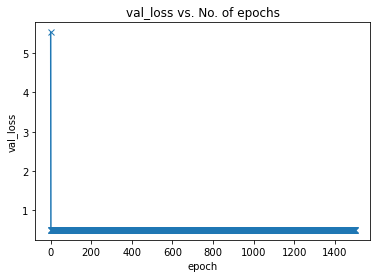

In [27]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history5]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [28]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)#???                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [29]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([7.3000e+00, 4.4000e-01, 2.0000e-01, 1.6000e+00, 4.9000e-02, 2.4000e+01,
        6.4000e+01, 9.9350e-01, 3.3800e+00, 5.7000e-01, 1.1700e+01])
Target: tensor([6.])
Prediction: tensor([5.9856])


In [30]:
input, target = val_ds[62]
predict_single(input, target, model)

Input: tensor([ 7.5000,  0.6000,  0.3200,  2.7000,  0.1030, 13.0000, 98.0000,  0.9994,
         3.4500,  0.6200,  9.5000])
Target: tensor([5.])
Prediction: tensor([5.0347])
